##### Grupo 2 - ADRIÁN TURIEL CHARRO, HONG XIANG CHEN, PABLO CIDONCHA CÓZAR
# Práctica 1C - Inteligencia Artificial
## Belén Díaz Agudo -  Facultad de Informática UCM
## Búsqueda local
En esta primera parte usaremos ejercicios paso a paso para familiarizarnos con la resolución de problemas sencillos de optimización, como la maximización o minimización de una función, o el problema de la mochila o del viajante, problemas conocidos cuya resolución se ha abordado con técnicas algorítmicas y que vamos a resolver utilizando algoritmos de búsqueda local. En la segunda parte de la práctica se pide resolver el problema de la organización de jornadas informáticas dado en el enunciado.

In [19]:
cd ../Practica1/aima-python

C:\Users\aturi\Ejercicios Python\Practica1\aima-python


## Parte 1. Algoritmo de escalada
Hill Climbing es un algoritmo de búsqueda local heurística utilizada para problemas de optimización.
Esta solución puede o no ser el óptimo global. El algoritmo es una variante del algoritmo de generación y prueba.
<br>
En general, el algoritmo funciona de la siguiente manera:
- Evaluar el estado inicial.
- Si es igual al estado del objetivo, terminamos.
- Encuentra un estado vecino al estado actual
- Evaluar este estado. Si está más cerca del estado objetivo que antes, reemplace el estado inicial con este estado y repita estos pasos.
<br>
Usaremos la implementación de AIMA que está en el módulo search.py

    def hill_climbing(problem):
        """From the initial node, keep choosing the neighbor with highest value,
        stopping when no neighbor is better. [Figure 4.2]"""
        current = Node(problem.initial)
        while True:
            neighbors = current.expand(problem)
            if not neighbors:
                break
            neighbor = argmax_random_tie(neighbors,
                                     key=lambda node: problem.value(node.state))
            if problem.value(neighbor.state) <= problem.value(current.state):
                break
            current = neighbor
        return current.state


### TSP (Travelling Salesman Problem): el problema del viajante
Dado un conjunto de ciudades y la distancia entre cada par de ciudades, el problema es encontrar la ruta más corta posible que visite cada ciudad exactamente una vez y regrese al punto de partida. Es un problema NP hard. No existen una solución de coste polinomial. 

In [20]:
##Resolvereremos el problema del viajante TSP para encontrar una solución aproximada.
from search import *

class TSP_problem(Problem):

    def two_opt(self, state):
        """ Neighbour generating function for Traveling Salesman Problem """
        neighbour_state = state[:]
        left = random.randint(0, len(neighbour_state) - 1)
        right = random.randint(0, len(neighbour_state) - 1)
        if left > right:
            left, right = right, left
        neighbour_state[left: right + 1] = reversed(neighbour_state[left: right + 1])
        return neighbour_state

    def actions(self, state):
        """ action that can be excuted in given state """
        return [self.two_opt]

    def result(self, state, action):
        """  result after applying the given action on the given state """
        return action(state)

    def path_cost(self, c, state1, action, state2):
        """ total distance for the Traveling Salesman to be covered if in state2  """
        cost = 0
        for i in range(len(state2) - 1):
            cost += distances[state2[i]][state2[i + 1]]
        cost += distances[state2[0]][state2[-1]]
        return cost

    def value(self, state):
        """ value of path cost given negative for the given state """
        return -1 * self.path_cost(None, None, None, state)

In [21]:
## Resolveremos el TSP para las ciudades de la lista de ciudades de Rumanía.
## ['Arad', 'Bucharest', 'Craiova', 'Drobeta', 'Eforie', 'Fagaras', 'Giurgiu', 'Hirsova', 'Iasi', 'Lugoj', 'Mehadia', 'Neamt', 'Oradea', 'Pitesti', 'Rimnicu', 'Sibiu', 'Timisoara', 'Urziceni', 'Vaslui', 'Zerind']

In [22]:
# Usaremos la siguiente representacion del libro AIMA para el mapa de Rumanía.

romania_map = UndirectedGraph(dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142)))

romania_map.locations = dict(
    Arad=(91, 492), Bucharest=(400, 327), Craiova=(253, 288),
    Drobeta=(165, 299), Eforie=(562, 293), Fagaras=(305, 449),
    Giurgiu=(375, 270), Hirsova=(534, 350), Iasi=(473, 506),
    Lugoj=(165, 379), Mehadia=(168, 339), Neamt=(406, 537),
    Oradea=(131, 571), Pitesti=(320, 368), Rimnicu=(233, 410),
    Sibiu=(207, 457), Timisoara=(94, 410), Urziceni=(456, 350),
    Vaslui=(509, 444), Zerind=(108, 531))

Es bastante sencillo entender este `romania_map`. El primer nodo ** Arad ** tiene tres vecinos llamados ** Zerind **, ** Sibiu **, ** Timisoara **. Cada uno de estos nodos son 75, 140, 118 unidades aparte de ** Arad ** respectivamente. Y lo mismo ocurre con otros nodos.

Y `romania_map.locations` contiene las posiciones de cada uno de los nodos. 
Como heurística se puede usar la distancia en línea recta o la distancia manhattan (que es diferente de la proporcionada en `romania_map`) entre dos ciudades.

In [6]:
romania_locations = romania_map.locations
print(romania_locations)

{'Arad': (91, 492), 'Bucharest': (400, 327), 'Craiova': (253, 288), 'Drobeta': (165, 299), 'Eforie': (562, 293), 'Fagaras': (305, 449), 'Giurgiu': (375, 270), 'Hirsova': (534, 350), 'Iasi': (473, 506), 'Lugoj': (165, 379), 'Mehadia': (168, 339), 'Neamt': (406, 537), 'Oradea': (131, 571), 'Pitesti': (320, 368), 'Rimnicu': (233, 410), 'Sibiu': (207, 457), 'Timisoara': (94, 410), 'Urziceni': (456, 350), 'Vaslui': (509, 444), 'Zerind': (108, 531)}


In [7]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in romania_map.locations.keys()}
node_positions = romania_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in romania_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in romania_map.graph_dict.items() for k2, v2 in v.items()}

romania_graph_data = {  'graph_dict' : romania_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

In [8]:
from IPython.display import HTML
from IPython.display import display
from PIL import Image
from matplotlib import lines
import ipywidgets as widgets
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [9]:
def show_map(graph_data, node_colors=None):
    G = nx.Graph(graph_data['graph_dict'])
    node_colors = node_colors or graph_data['node_colors']
    node_positions = graph_data['node_positions']
    node_label_pos = graph_data['node_label_positions']
    edge_weights = graph_data['edge_weights']

    # set the size of the plot
    plt.figure(figsize=(18, 13))
    # draw the graph (both nodes and edges) with locations from romania_locations
    nx.draw(G, pos={k: node_positions[k] for k in G.nodes()},
            node_color=[node_colors[node] for node in G.nodes()], linewidths=0.3, edgecolors='k')

    # draw labels for nodes
    node_label_handles = nx.draw_networkx_labels(G, pos=node_label_pos, font_size=14)

    # add a white bounding box behind the node labels
    [label.set_bbox(dict(facecolor='white', edgecolor='none')) for label in node_label_handles.values()]

    # add edge lables to the graph
    nx.draw_networkx_edge_labels(G, pos=node_positions, edge_labels=edge_weights, font_size=14)

    # add a legend
    white_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="white")
    orange_circle = lines.Line2D([], [], color="orange", marker='o', markersize=15, markerfacecolor="orange")
    red_circle = lines.Line2D([], [], color="red", marker='o', markersize=15, markerfacecolor="red")
    gray_circle = lines.Line2D([], [], color="gray", marker='o', markersize=15, markerfacecolor="gray")
    green_circle = lines.Line2D([], [], color="green", marker='o', markersize=15, markerfacecolor="green")
    plt.legend((white_circle, orange_circle, red_circle, gray_circle, green_circle),
               ('Un-explored', 'Frontier', 'Currently Exploring', 'Explored', 'Final Solution'),
               numpoints=1, prop={'size': 16}, loc=(.8, .75))

    # show the plot. No need to use in notebooks. nx.draw will show the graph itself.
    plt.show()

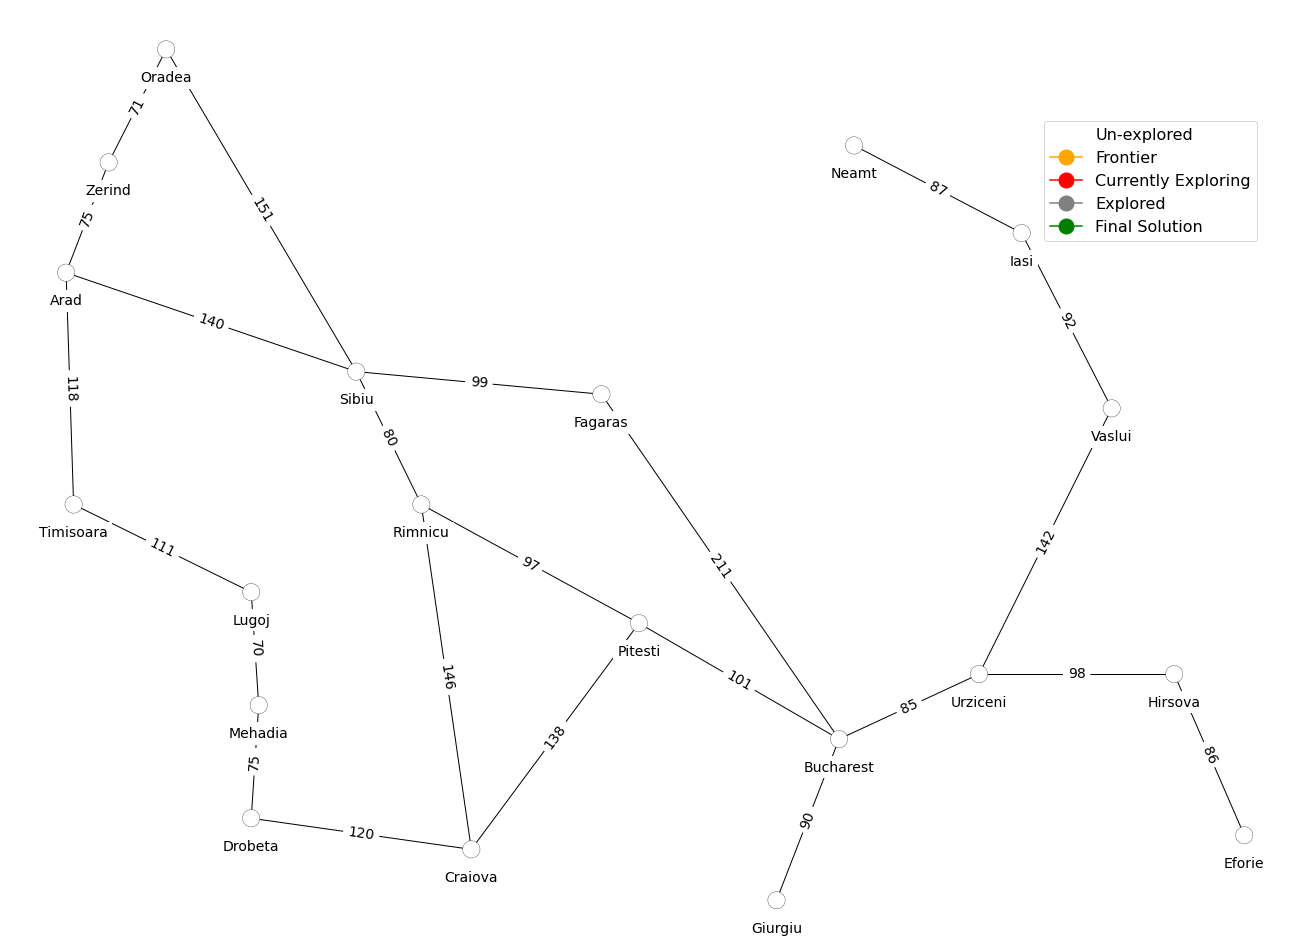

In [10]:
show_map(romania_graph_data)

In [11]:
## el siguiente código crea un diccionario y calcula y añade al diccionario la distancia manhattan entre las ciudades. 
import numpy as np

distances = {}
all_cities = []

for city in romania_map.locations.keys():
    distances[city] = {}
    all_cities.append(city)
    
all_cities.sort()
print(all_cities)

for name_1, coordinates_1 in romania_map.locations.items():
        for name_2, coordinates_2 in romania_map.locations.items():
            distances[name_1][name_2] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])
            distances[name_2][name_1] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])

['Arad', 'Bucharest', 'Craiova', 'Drobeta', 'Eforie', 'Fagaras', 'Giurgiu', 'Hirsova', 'Iasi', 'Lugoj', 'Mehadia', 'Neamt', 'Oradea', 'Pitesti', 'Rimnicu', 'Sibiu', 'Timisoara', 'Urziceni', 'Vaslui', 'Zerind']


In [12]:
# Creamos una instancia del problema TSP con la lista de ciudades anterior que se na extraido del mapa.
# En el mapa hay informacion de las distancias que se utilizan en la clase TSP_problem para calcular el coste y las heurísticas.
tsp = TSP_problem(all_cities)

In [13]:
## Redefinimos el hill climbing de AIMA
def hill_climbing_max(problem):
    
    """From the initial node, keep choosing the neighbor with highest value,
    stopping when no neighbor is better. [Figure 4.2]"""
    
    def find_neighbors(state, number_of_neighbors=100):
        """ finds neighbors using two_opt method """
        
        neighbors = []
        
        for i in range(number_of_neighbors):
            new_state = problem.two_opt(state)
            neighbors.append(Node(new_state))
            state = new_state
            
        return neighbors

    # as this is a stochastic algorithm, we will set a cap on the number of iterations
    iterations = 10000
    
    current = Node(problem.initial)
    while iterations:
        neighbors = find_neighbors(current.state)
        if not neighbors:
            break
        neighbor = argmax_random_tie(neighbors,
                                     key=lambda node: problem.value(node.state))        
        if problem.value(neighbor.state) <= problem.value(current.state):
            current.state = neighbor.state
        iterations -= 1
        
    return current.state

In [14]:
# Y lo resolvemos con escalada. 
hill_climbing(tsp)

['Arad',
 'Bucharest',
 'Craiova',
 'Drobeta',
 'Eforie',
 'Fagaras',
 'Giurgiu',
 'Hirsova',
 'Iasi',
 'Lugoj',
 'Mehadia',
 'Neamt',
 'Oradea',
 'Pitesti',
 'Rimnicu',
 'Sibiu',
 'Timisoara',
 'Urziceni',
 'Vaslui',
 'Zerind']

### Ejercicio 1. Resuelve el problema TSP con el algoritmo de escalada por máxima pendiente en el mapa de ciudades de Rumanía y explica el resultado obtenido. 

#### a) Realiza un análisis razonado de las propiedades del algoritmo: eficiencia y optimalidad en base a la ejecución. 

Los algoritmos de escalada no son completos, el óptimo global puede no ser alcanzado ya que desde el nodo en el que estamos, si no hay una solución mejor, finaliza ahí la ejecución. Tampoco son algoritmos óptimos pues podemos quedarnos bloqueados en óptimos locales. Aun así, garantizamos encontrar una solución ya sea mejor o peor, pues limitamos el número de iteraciones (10.000).

Según el funcionamiento del algoritmo, calculamos la distancia euclídea de dos ciudades, es decir una línea recta entre esos dos puntos del mapa, sin tener en cuenta si realmente existe o no esa carretera en el grafo. Por eso, dadas dos ciudades, hay que calcular el recorrido más corto por el grafo.


#### b) ¿Ha encontrado el algoritmo el óptimo global? ¿Ha encontrado la misma solución en distintas ejecuciones?

Sera muy complicado de encontrar el algoritmo del óptimo global, por la gran cantidad de ciudades que hay, en concreto 20, esto significa permutaciones de 20, que equivale a 10^18 posibles soluciones, entonces, una vez encontrado una solución con cierta optimalidad, es difícil de encontrar una solución más optima, ya que la posibilidad de encontrar una mejor aleatoriamente se reduce.

In [15]:
sol1 = hill_climbing_max(tsp)
sol1

['Fagaras',
 'Mehadia',
 'Vaslui',
 'Sibiu',
 'Iasi',
 'Eforie',
 'Arad',
 'Oradea',
 'Rimnicu',
 'Urziceni',
 'Timisoara',
 'Giurgiu',
 'Drobeta',
 'Craiova',
 'Neamt',
 'Hirsova',
 'Bucharest',
 'Pitesti',
 'Lugoj',
 'Zerind']

In [16]:
sol2 = hill_climbing_max(tsp)
sol2

['Timisoara',
 'Craiova',
 'Lugoj',
 'Bucharest',
 'Oradea',
 'Vaslui',
 'Hirsova',
 'Giurgiu',
 'Urziceni',
 'Zerind',
 'Pitesti',
 'Rimnicu',
 'Fagaras',
 'Drobeta',
 'Sibiu',
 'Neamt',
 'Eforie',
 'Mehadia',
 'Iasi',
 'Arad']

In [19]:
sol3 = hill_climbing_max(tsp)
sol3

['Vaslui',
 'Bucharest',
 'Eforie',
 'Mehadia',
 'Sibiu',
 'Rimnicu',
 'Hirsova',
 'Urziceni',
 'Zerind',
 'Fagaras',
 'Drobeta',
 'Lugoj',
 'Giurgiu',
 'Timisoara',
 'Pitesti',
 'Arad',
 'Neamt',
 'Iasi',
 'Craiova',
 'Oradea']

In [18]:
sol4 = hill_climbing_max(tsp)
sol4

['Pitesti',
 'Craiova',
 'Sibiu',
 'Vaslui',
 'Neamt',
 'Arad',
 'Eforie',
 'Urziceni',
 'Mehadia',
 'Drobeta',
 'Timisoara',
 'Zerind',
 'Iasi',
 'Fagaras',
 'Lugoj',
 'Giurgiu',
 'Oradea',
 'Hirsova',
 'Rimnicu',
 'Bucharest']

In [22]:
sol5 = hill_climbing_max(tsp)
sol5

['Urziceni',
 'Zerind',
 'Vaslui',
 'Drobeta',
 'Pitesti',
 'Lugoj',
 'Giurgiu',
 'Bucharest',
 'Fagaras',
 'Timisoara',
 'Iasi',
 'Mehadia',
 'Craiova',
 'Hirsova',
 'Eforie',
 'Neamt',
 'Oradea',
 'Sibiu',
 'Rimnicu',
 'Arad']

Tras numerosas ejecuciones, comprobamos que hay una gran diversidad de soluciones.

#### c) Sólo se pide hacer una comparativa teórica (breve) con cómo se comporta este algoritmo y relacionarlo con otros algoritmos vistos en clase. 
En escalada simple vamos avanzando a medida que vamos encontrando un sucesor mejor que el actual, y en escalada de máxima pendiente analizamos todos los hijos y nos quedamos con el mejor. Como solución a estos, con el algoritmo de haz local, realizamos los mismos pasos que en escalada, solo que lo hacemos para k nodos inicialmente, y si uno de esos se bloquea seguimos por los otros. Otra alternativa seria usar el algoritmo de enfriamiento simulado, el cual nos permite ir a estados peores en función de unas probabilidades con el fin de no quedarnos atascados en máximos locales.

#### d) Opcionalmente se puede hacer la comparativa real con algún algoritmo de búsqueda exhaustiva. 
Entre los algoritmos de búsqueda exhaustiva esta; búsqueda en anchura y en profundidad. Los algoritmos de escaladas funcionan como primero en profundidad guiados por la heurística, pero sólo descienden si mejora y no hay vuelta atrás.

## Parte 2. Enfriamiento simulado ( simulated annealing) 
El algoritmo de enfriamiento simulado puede manejar las situaciones de óptimo local o mesetas típicas en algoritmos de escalada.
<br>
El enfriamiento simulado es bastante similar al de escalada pero en lugar de elegir el mejor movimiento en cada iteración, elige un movimiento aleatorio. Si este movimiento aleatorio nos acerca al óptimo global, será aceptado, pero si no lo hace, el algoritmo puede aceptar o rechazar el movimiento en función de una probabilidad dictada por la temperatura.  Cuando la `temperatura` es alta, es más probable que el algoritmo acepte un movimiento aleatorio incluso si es malo. A bajas temperaturas, solo se aceptan buenos movimientos, con alguna excepción ocasional.
Esto permite la exploración del espacio de estado y evita que el algoritmo se atasque en el óptimo local.

    Usaremos la implementación de AIMA del modulo search.py
    
    def simulated_annealing(problem, schedule=exp_schedule()):
    """[Figure 4.5] CAUTION: This differs from the pseudocode as it
    returns a state instead of a Node."""
    current = Node(problem.initial)
    for t in range(sys.maxsize):
        T = schedule(t)
        if T == 0:
            return current.state
        neighbors = current.expand(problem)
        if not neighbors:
            return current.state
        next_choice = random.choice(neighbors)
        delta_e = problem.value(next_choice.state) - problem.value(current.state)
        if delta_e > 0 or probability(math.exp(delta_e / T)):
            current = next_choice

Como hemos visto en clase hay varios métodos de enfriamiento (scheduling routine) 
Se puede variar el método de enfriamiento. En la implementación actual estamos usando el método de enfriamiento exponencial (que se pasa como parámetro). 

    def exp_schedule(k=20, lam=0.005, limit=100):
        """One possible schedule function for simulated annealing"""
        return lambda t: (k * math.exp(-lam * t) if t < limit else 0)

Como ejemplo, vamos a definir un problema sencillo de encontrar el punto más alto en una rejilla. Este problema está definido en el módulo search.py como PeakFindingProblem. Lo reproducimos aquí y creamos una rejilla simple.

In [23]:
initial = (0, 0)
grid = [[3, 7, 2, 8], [5, 2, 9, 1], [5, 3, 3, 1]]

In [24]:
# Pre-defined actions for PeakFindingProblem
directions4 = { 'W':(-1, 0), 'N':(0, 1), 'E':(1, 0), 'S':(0, -1) }
directions8 = dict(directions4) 
directions8.update({'NW':(-1, 1), 'NE':(1, 1), 'SE':(1, -1), 'SW':(-1, -1) })

class PeakFindingProblem(Problem):
    """Problem of finding the highest peak in a limited grid"""

    def __init__(self, initial, grid, defined_actions=directions4):
        """The grid is a 2 dimensional array/list whose state is specified by tuple of indices"""
        Problem.__init__(self, initial)
        self.grid = grid
        self.defined_actions = defined_actions
        self.n = len(grid)
        assert self.n > 0
        self.m = len(grid[0])
        assert self.m > 0

    def actions(self, state):
        """Returns the list of actions which are allowed to be taken from the given state"""
        allowed_actions = []
        for action in self.defined_actions:
            next_state = vector_add(state, self.defined_actions[action])
            if next_state[0] >= 0 and next_state[1] >= 0 and next_state[0] <= self.n - 1 and next_state[1] <= self.m - 1:
                allowed_actions.append(action)

        return allowed_actions

    def result(self, state, action):
        """Moves in the direction specified by action"""
        return vector_add(state, self.defined_actions[action])

    def value(self, state):
        """Value of a state is the value it is the index to"""
        x, y = state
        assert 0 <= x < self.n
        assert 0 <= y < self.m
        return self.grid[x][y]


In [25]:
problem = PeakFindingProblem(initial, grid, directions4)

In [26]:
# Lo resolvemos con enfriamiento simulado

solutions = {problem.value(simulated_annealing(problem)) for i in range(100)}
max(solutions)

9

In [27]:
def hill_climbing(problem):
    """From the initial node, keep choosing the neighbor with highest value,
    stopping when no neighbor is better. [Figure 4.2]"""
    current = Node(problem.initial)
    while True:
        neighbors = current.expand(problem)
        if not neighbors:
            break
        neighbor = argmax_random_tie(neighbors,
                                     key=lambda node: problem.value(node.state))
        if problem.value(neighbor.state) <= problem.value(current.state):
            break
        current = neighbor
    return current.state

In [28]:
solution = problem.value(hill_climbing(problem))
solution

7

### Ejercicio 2.  Resuelve el problema anterior de encontrar el punto máximo en una rejilla. Comenta y razona los resultados obtenidos en distintas rejjillas con los algoritmos de enfriamiento simulado y escalada por máxima pendiente. 
 
 
Ejemplo de rejilla para pruebas

grid = [[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.40, 0.40, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 11.2, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 9.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00]]


El objetivo del enfriamiento simulado es no estancarse en ninguna meseta ni óptimo local.
Por eso elije el siguiente movimiento de manera aleatoria, pudiendo ser mejor o peor que el actual, y este será aceptado o no, en función de unas probabilidades previamente definidas.

En el caso del ejemplo nos devuelve 11.2 ya que es el caso el punto más alto de la rejilla. El resultado va a ser el mismo independientemente de que el tercer parámetro sea directions4 ó directions8, gracias a la aleatoriedad del movimiento realizado. 

Por otro lado, la escalada de máxima pendiente va comparando el elemento actual con sus elementos vecinos, si el vecino es mejor se queda con ese y vuelve a hacer la comparación, si el actual es el mejor devuelve ese, si el tercer parámetro es directions4 sus elementos vecinos son los elementos de arriba, abajo, izquierda y derecha, en cambio si el tercer parámetro es directions8, además de esos también se tendrán en cuenta sus diagonales. 

En este caso independientemente de este último parámetro el resultado obtenido va a ser 0.0 ya que el primer elemento es 0.0 y está rodeado por lo mismo. EL principal problema del hill climbing es que se puede quedar estancado muy pronto y no devolverte una buena solución, como ocurre en este ejemplo, que deja muchos casos por explorar y se estanca demasiado pronto.


## Parte 3. Algoritmos genéticos


Se define una clase ProblemaGenetico que incluye los elementos necesarios para la representación de un problema de optimización que se va a resolver con un algoritmo genético. Los elementos son los que hemos visto en clase:

 - genes: lista de genes usados en el genotipo de los estados.
 - longitud_individuos: longitud de los cromosomas
 - decodifica: función de obtiene el fenotipo a partir del genotipo.
 - fitness: función de valoración.
 - muta: función de mutación de un cromosoma 
 - cruza: función de cruce de un par de cromosomas

In [29]:
import random

In [23]:
class ProblemaGenetico(object):
        def __init__(self, genes,fun_dec,fun_muta , fun_cruza, fun_fitness,longitud_individuos):
            self.genes = genes
            self.fun_dec = fun_dec
            self.fun_cruza = fun_cruza
            self.fun_muta = fun_muta
            self.fun_fitness = fun_fitness
            self.longitud_individuos = longitud_individuos
            """Constructor de la clase"""
                
        def decodifica(self, genotipo):
            """Devuelve el fenotipo a partir del genotipo"""
            fenotipo = self.fun_dec(genotipo)
            return fenotipo
        def muta(self, cromosoma,prob):
            """Devuelve el cromosoma mutado"""   
            mutante = self.fun_muta(cromosoma,prob)
            return mutante
        def cruza(self, cromosoma1, cromosoma2):         
            """Devuelve el cruce de un par de cromosomas"""
            cruce = self.fun_cruza(cromosoma1,cromosoma2)
            return cruce 
        def fitness(self, cromosoma):    
            """Función de valoración"""
            valoracion = self.fun_fitness(cromosoma)
            return valoracion

En primer lugar vamos a definir una instancia de la clase anterior correspondiente al problema de optimizar (maximizar o minimizar) la función cuadrado x^2 en el conjunto de los números naturales menores que 2^{10}.
Se usa este ejemplo (del que sabemos la solución) para ver todos los elementos y poder observar el comportamiento. 


In [27]:
# Será necesaria la siguiente función que interpreta una lista de 0's y 1's como un número natural:  
# La siguiente función que interpreta una lista de 0's y 1's como
# un número natural:  

def binario_a_decimal(x):
    return sum(b*(2**i) for (i,b) in enumerate(x)) 

In [28]:
list(enumerate([1, 0, 0]))

[(0, 1), (1, 0), (2, 0)]

In [29]:
# En primer luegar usaremos la clase anterior para representar el problema de optimizar (maximizar o minimizar)
# la función cuadrado en el conjunto de los números naturales menores que
# 2^{10}.

# Tenemos que definir funciones de cruce, mutación y fitness para este problema.

def fun_cruzar(cromosoma1, cromosoma2):
    """Cruza los cromosomas por la mitad"""
    l1 = len(cromosoma1)
    l2 = len(cromosoma2)
    cruce1 = cromosoma1[0:l1//2]+cromosoma2[l1//2:l2]
    cruce2 = cromosoma2[0:l2//2]+cromosoma1[l2//2:l1]
    return [cruce1,cruce2]

def fun_mutar(cromosoma,prob):
    """Elige un elemento al azar del cromosoma y lo modifica con una probabilidad igual a prob"""
    l = len(cromosoma)
    p = random.randint(0,l-1)
    if prob > random.uniform(0,1):
        cromosoma[p] =  (cromosoma[p]+1)%2
    return cromosoma

def fun_fitness_cuad(cromosoma):
    """Función de valoración que eleva al cuadrado el número recibido en binario"""
    n = binario_a_decimal(cromosoma)**2
    return n

cuadrados = ProblemaGenetico([0,1],binario_a_decimal,fun_mutar, fun_cruzar, fun_fitness_cuad,10)

In [34]:
cuadrados.decodifica([1,0,0,0,1,1,0,0,1,0,1])
# Salida esperada: 1329

1329

In [35]:
cuadrados.fitness([1,0,0,0,1,1,0,0,1,0,1])
# Salida esperada: 1766241

1766241

In [36]:
cuadrados.muta([1,0,0,0,1,1,0,0,1,0,1],0.1)
# Posible salida: [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

[1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1]

In [37]:
cuadrados.muta([1,0,0,0,1,1,0,0,1,0,1],0.1)
# Posible salida: [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

In [38]:
cuadrados.cruza([1,0,0,0,1,1,0,0,1,0,1],[0,1,1,0,1,0,0,1,1,1])
# Posible salida: [[1, 0, 0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]]

[[1, 0, 0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]]

### Ejercicio 3

   - Definir una función poblacion_inicial(problema_genetico,tamaño), para definir una población inicial de un tamaño dado, para una instancia dada de la clase anterior ProblemaGenetico

sugerencia: usar random.choice

   - Definir una función de cruce que recibe una instancia de Problema_Genetico y una población de padres (supondremos que hay un número par de padres), obtiene la población resultante de cruzarlos de dos en dos (en el orden en que aparecen)

cruza_padres(problema_genetico,padres)

   - Definir la función de mutación que recibe una instancia de Problema_Genetico, una población y una probabilidad de mutación, obtiene la población resultante de aplicar operaciones de mutación a cada individuo llamando a la función muta definida para el problema genético.
muta_individuos(problema_genetico, poblacion, prob)

In [39]:
def poblacion_inicial(problema_genetico, size):
    k = []
    for i in range(size):
        l = []
        for j in range(problema_genetico.longitud_individuos):
            l.append(random.choice(problema_genetico.genes))
        k.append(l)
    return k

In [40]:
poblacion_inicial(cuadrados,10)

[[0, 1, 0, 0, 1, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
 [0, 1, 0, 0, 1, 0, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
 [1, 0, 1, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 1, 0, 1, 0, 1, 1, 0, 0],
 [1, 1, 1, 1, 1, 0, 1, 0, 1, 1],
 [1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
 [1, 1, 1, 0, 0, 0, 1, 1, 1, 0]]

In [46]:
def cruza_padres(problema_genetico, padres):
    l = []
    for i in range(0, len(padres), 2):
        aux = fun_cruzar(padres[i], padres[i+1])
        l.append(aux[0])
        l.append(aux[1])
    return l

In [42]:
p1 = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
      [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
      [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

cruza_padres(cuadrados,p1)
# Posible salida
# [[1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
#  [0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#  [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
#  [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
#  [0, 1, 1, 1, 1, 0, 1, 1, 0, 1],
#  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]]

[[1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 1, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 0, 1, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 1, 1, 0, 1],
 [1, 0, 1, 1, 1, 0, 0, 0, 0, 0]]

In [47]:
def muta_individuos(problema_genetico, poblacion, prob):
    l = []
    for x in poblacion:
        l.append(problema_genetico.muta(x,prob))
    return l

In [44]:
muta_individuos(cuadrados,p1,0.5)
# Posible salida:
#  [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#   [0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
#   [0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
#   [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
#   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
#   [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

[[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
 [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

In [45]:
p1 = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
      [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
      [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

In [46]:
muta_individuos(cuadrados,p1,0.5)

[[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
 [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 1, 0, 1, 1, 0, 0]]

### Ejercicio 4

Se pide definir una función de selección mediante torneo de n individuos de una población.  
La función recibe como entrada:
 - una instancia de la clase ProblemaGenetico
 - una población
 - el número n de individuos que vamos a seleccionar
 - el número k de participantes en el torneo
 - un valor opt que puede ser o la función max o la función min (dependiendo de si el problema es de maximización o de minimización, resp.).

seleccion\_por\_torneo(problema_genetico,poblacion,n,k,opt) 

INDICACIÓN: Usar random.sample para seleccionar k elementos de una secuencia. 
Por ejemplo, random.sample(population=[2,5,7,8,9], k=3) devuelve [7,5,8]. 

In [44]:
def seleccion_por_torneo(problema_genetico, poblacion, n, k, opt):
    """Selección por torneo de n individuos de una población. Siendo k el nº de participantes
        y opt la función max o min."""
    seleccionados = []
    for i in range(n):
        participantes = random.sample(poblacion,k)
        seleccionado = opt(participantes, key=problema_genetico.fitness)
        opt(poblacion, key=problema_genetico.fitness)
        seleccionados.append(seleccionado)
        # poblacion.remove(seleccionado)
    return seleccionados  

In [48]:
#Ejemplo
seleccion_por_torneo(cuadrados, poblacion_inicial(cuadrados,8),3,6,max)
# Posible salida: [[1, 1, 1, 1, 1, 0, 0, 0, 1, 1], [1, 0, 0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 1, 1, 0, 1, 1, 1, 0, 1]]

[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 1]]

In [49]:
seleccion_por_torneo(cuadrados, poblacion_inicial(cuadrados,8),3,6,min)
# [[0, 0, 1, 1, 0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 1, 1, 1, 0, 0, 0], [1, 1, 0, 1, 0, 0, 1, 0, 1, 0]]

[[1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
 [1, 1, 0, 1, 1, 0, 0, 0, 0, 0]]

In [50]:
# La siguiente función implementa una posibilidad para el algoritmo genético completo: 
# inicializa t = 0 
# Generar y evaluar la Población P(t)
# Mientras no hemos llegado al número de generaciones fijado:  t < nGen
#    P1 = Selección por torneo de (1-size)·p individuos de P(t)
#    P2 = Selección por torneo de (size·p) individuos de P(t)
#    Aplicar cruce en la población P2
#    P4 = Union de P1 y P3
#    P(t+1) := Aplicar mutación P4 
#    Evalua la población P(t+1) 
#    t:= t+1
        
# Sus argumentos son:
# problema_genetico: una instancia de la clase ProblemaGenetico con la representación adecuada del problema de optimización 
# que se quiere resolver.
# k: número de participantes en los torneos de selección.
# opt: max ó min, dependiendo si el problema es de maximización o de minimización. 
# nGen: número de generaciones (que se usa como condición de terminación)
# size: número de individuos en cada generación
# prop_cruce: proporción del total de la población que serán padres. 
# prob_mutación: probabilidad de realizar una mutación de un gen.

def algoritmo_genetico(problema_genetico,k,opt,ngen,size,prop_cruces,prob_mutar):
    poblacion= poblacion_inicial(problema_genetico,size)
    n_padres=round(size*prop_cruces)
    n_padres= int (n_padres if n_padres%2==0 else n_padres-1)
    n_directos = size-n_padres
    for _ in range(ngen):
        poblacion= nueva_generacion(problema_genetico,k,opt,poblacion,n_padres, n_directos,prob_mutar)

    mejor_cr= opt(poblacion, key=problema_genetico.fitness)
    mejor=problema_genetico.decodifica(mejor_cr)
    return (mejor,problema_genetico.fitness(mejor_cr)) 


Necesitarás definir la función auxiliar nueva_generacion(problema_genetico,poblacion,n_padres,n_directos,prob_mutar) que dada una población calcula la siguiente generación.

In [42]:
#Definir la función nueva_generacion
def nueva_generacion(problema_genetico, k,opt, poblacion, n_padres, n_directos, prob_mutar):
    padres2 = seleccion_por_torneo(problema_genetico, poblacion, n_directos, k,opt) 
    padres1 = seleccion_por_torneo(problema_genetico, poblacion, n_padres , k, opt)
    cruces =  cruza_padres(problema_genetico,padres1)
    generacion = padres2+cruces
    resultado_mutaciones = muta_individuos(problema_genetico, generacion, prob_mutar)
    return resultado_mutaciones

### Ejercicio 5.  Ejecutar el algoritmo genético anterior, para resolver el problema anterior (tanto en minimización como en maximización).  

Hacer una valoración de resultados y comentarios sobre el comportamiento del algoritmmo. 
En la resolución del problema hay que tener en cuenta que el algoritmo genético devuelve un par con el mejor fenotipo encontrado y su valoración.

In [52]:
algoritmo_genetico(cuadrados,3,min,20,10,0,0)
# Salida esperada: (0, 0)

(213, 45369)

In [53]:
algoritmo_genetico(cuadrados,3,max,20,10,0.7,0.1)
# Salida esperada: (1023, 1046529)

(1022, 1044484)

In [54]:
import operator

print("(x, x^2) -> Probabilidad de que salga")
print("---------------------------------------")

dictMin = dict()
for _ in range(1000):
    result = algoritmo_genetico(cuadrados, 3, min, 20, 10, 0.7, 0.1)
    if result in dictMin:
        dictMin[result] += 1
    else:
        dictMin[result] = 1

sortMin = sorted(dictMin.items(), key = operator.itemgetter(1), reverse = True)
for result in sortMin:
    print(result[0],'->', round(result[1]/10, 2),'%')

(x, x^2) -> Probabilidad de que salga
---------------------------------------
(0, 0) -> 50.2 %
(1, 1) -> 8.0 %
(32, 1024) -> 6.9 %
(2, 4) -> 6.8 %
(4, 16) -> 4.4 %
(64, 4096) -> 3.9 %
(8, 64) -> 3.9 %
(16, 256) -> 1.4 %
(33, 1089) -> 0.9 %
(65, 4225) -> 0.8 %
(128, 16384) -> 0.8 %
(6, 36) -> 0.7 %
(3, 9) -> 0.7 %
(17, 289) -> 0.6 %
(5, 25) -> 0.5 %
(66, 4356) -> 0.5 %
(12, 144) -> 0.5 %
(9, 81) -> 0.5 %
(256, 65536) -> 0.4 %
(10, 100) -> 0.4 %
(96, 9216) -> 0.4 %
(20, 400) -> 0.3 %
(40, 1600) -> 0.3 %
(68, 4624) -> 0.3 %
(130, 16900) -> 0.3 %
(136, 18496) -> 0.3 %
(129, 16641) -> 0.3 %
(34, 1156) -> 0.3 %
(36, 1296) -> 0.3 %
(98, 9604) -> 0.3 %
(35, 1225) -> 0.2 %
(132, 17424) -> 0.2 %
(144, 20736) -> 0.2 %
(48, 2304) -> 0.2 %
(72, 5184) -> 0.2 %
(38, 1444) -> 0.2 %
(264, 69696) -> 0.1 %
(260, 67600) -> 0.1 %
(80, 6400) -> 0.1 %
(161, 25921) -> 0.1 %
(192, 36864) -> 0.1 %
(69, 4761) -> 0.1 %
(7, 49) -> 0.1 %
(28, 784) -> 0.1 %
(41, 1681) -> 0.1 %
(320, 102400) -> 0.1 %
(49, 2401) -> 0.

In [55]:
print("(x, x^2) -> Probabilidad de que salga")
print("---------------------------------------")

dictMax = dict()
for _ in range(1000):
    result = algoritmo_genetico(cuadrados, 3, max, 20, 10, 0.7, 0.1)
    if result in dictMax:
        dictMax[result] += 1
    else:
        dictMax[result] = 1

sortMax = sorted(dictMax.items(), key = operator.itemgetter(1), reverse = True)
for result in sortMax:
     print(result[0],'->', round(result[1]/10, 2),'%')

(x, x^2) -> Probabilidad de que salga
---------------------------------------
(1023, 1046529) -> 51.2 %
(1021, 1042441) -> 7.1 %
(1022, 1044484) -> 7.1 %
(1019, 1038361) -> 5.4 %
(991, 982081) -> 4.9 %
(1015, 1030225) -> 4.3 %
(959, 919681) -> 3.7 %
(895, 801025) -> 1.8 %
(1007, 1014049) -> 1.5 %
(1017, 1034289) -> 1.0 %
(958, 917764) -> 1.0 %
(989, 978121) -> 0.9 %
(1020, 1040400) -> 0.9 %
(1018, 1036324) -> 0.8 %
(983, 966289) -> 0.8 %
(990, 980100) -> 0.7 %
(1014, 1028196) -> 0.7 %
(987, 974169) -> 0.6 %
(957, 915849) -> 0.4 %
(1005, 1010025) -> 0.4 %
(1013, 1026169) -> 0.4 %
(894, 799236) -> 0.3 %
(1006, 1012036) -> 0.3 %
(955, 912025) -> 0.3 %
(943, 889249) -> 0.3 %
(893, 797449) -> 0.2 %
(927, 859329) -> 0.2 %
(1011, 1022121) -> 0.2 %
(919, 844561) -> 0.2 %
(1012, 1024144) -> 0.2 %
(1016, 1032256) -> 0.2 %
(767, 588289) -> 0.2 %
(889, 790321) -> 0.1 %
(823, 677329) -> 0.1 %
(981, 962361) -> 0.1 %
(1004, 1008016) -> 0.1 %
(859, 737881) -> 0.1 %
(946, 894916) -> 0.1 %
(762, 580644)

Para sacar conclusiones sobre el algoritmo, hemos creado este programa que lo que hace es simular que el algoritmo_genetico se ejecuta 1000 veces, cuenta el número de veces que sale cada resultado y nos proporciona un porcentaje que determina la probabilidad de que salga ese caso en concreto.

Podemos observar que cuando llamamos al min el 52.1% de las veces nos va a devolver el par (0,0) ya que es el mínimo elemento de todos. También se aprecia que al llamar al max el 52.1% de las veces el resultado obtenido es (1023,1046529), que es el número más grande de todos los que salen.

El algoritmo_genetico lo que hace es devolvernos un par con su mejor fenotipo y su valoración, en este caso el resultado es mejor cuanto mayor sea el par que devuelve (para max), y al contrario (para min), ya que estamos sacando el cuadrado de un número.


##  El problema de la mochila 

Se plantea el típico problema de la mochila en el que dados n objetos de pesos conocidos pi y valor vi (i=1,...,n) hay que elegir cuáles se meten en una mochila que soporta un peso P máximo. La selección debe hacerse de forma que se máximice el valor de los objetos introducidos sin superar el peso máximo.

### Ejercicio 6
Se pide definir la representación del problema de la mochila usando genes [0,1] y longitud de los individuos n.

Los valores 1 ó 0 representan, respectivamente, si el objeto se introduce o no en la mochila Tomados de izquerda a derecha, a partir del primero que no cabe, se consideran  todos fuera de la mochila,independientemente del gen en su posición. De esta manera, todos los individuos representan candidatos válidos.

El numero de objetos n determina la longitud de los individuos de la población.
En primer lugar es necesario definir una función de decodificación de la mochila que recibe como entrada:
* un cromosoma (en este caso, una lista de 0s y 1s, de longitud igual a n_objetos) 
* n: número total de objetos de la mochila
* pesos: una lista con los pesos de los objetos
* capacidad: peso máximo de la mochila.
La función decodifica recibe (cromosoma, n, pesos, capacidad) y devuelve una lista de 0s y 1s que indique qué objetos están en la mochila y cuáles no (el objeto i está en la mochila si y sólo si en la posición i-ésima de la lista hay un 1). Esta lista se obtendrá a partir del cromosoma, pero teniendo en cuenta que a partir del primer objeto que no quepa, éste y los siguientes se consideran fuera de la mochila, independientemente del valor que haya en su correspondiente posición de cromosoma. 

In [56]:
def decodifica_mochila(cromosoma, n, pesos, capacidad):
    peso_en_mochila = 0
    l = []
    for i in range(n):
        if cromosoma[i] == 1 and peso_en_mochila + pesos[i] <= capacidad:
            l.append(1)
            peso_en_mochila += pesos[i]
        elif cromosoma[i]== 0 or peso_en_mochila + pesos[i] > capacidad:
            l.append(0)
    return l 

In [57]:
decodifica_mochila([1,1,1,1,1], 5, [2,3,4,5,1], 5)

[1, 1, 0, 0, 0]

Para definir la función de evaluación (fitness) necesitamos calcular el valor total de los objetos que están dentro de la mochila que representa el cromosoma según la codificación utilizada en la función anterior. 

Se pide la función fitness (cromosoma, n_objetos, pesos, capacidad, valores) donde los parámetros son los mismos que en la función anterior, y valores es la lista de los valores de cada objeto

fitness(cromosoma, n_objetos, pesos, capacidad, valores)

Ejemplo de uso:
   fitness([1,1,1,1], 4, [2,3,4,5], 4, [7,1,4,5])
   7

In [58]:
def fitness_mochila(cromosoma, n_objetos, pesos, capacidad, valores):
    metidos = decodifica_mochila(cromosoma, n_objetos, pesos, capacidad)

    valor = 0
    i = 0
    #print (metidos)
    while(i < n_objetos):
        if metidos[i] == 1 :
            valor += valores[i]
        i+=1

    return valor

In [59]:
fitness_mochila([1,1,1,1], 4, [2,3,4,5], 4, [7,1,4,5])

7

Damos tres instancias concretas del problema de la mochila. Damos también sus soluciones optimas, para que se puedan comparar con los resultados obtenidos por el algoritmo genético:

In [60]:
# Problema de la mochila 1:
# 10 objetos, peso máximo 165
pesos1 = [23,31,29,44,53,38,63,85,89,82]
valores1 = [92,57,49,68,60,43,67,84,87,72]

# Solución óptima= [1,1,1,1,0,1,0,0,0,0], con valor 309

In [61]:
# Problema de la mochila 2:
# 15 objetos, peso máximo 750

pesos2 = [70,73,77,80,82,87,90,94,98,106,110,113,115,118,120]
valores2 = [135,139,149,150,156,163,173,184,192,201,210,214,221,229,240]

# Solución óptima= [1,0,1,0,1,0,1,1,1,0,0,0,0,1,1] con valor 1458

In [62]:
# Problema de la mochila 3:
# 24 objetos, peso máximo 6404180
pesos3 = [382745,799601,909247,729069,467902, 44328,
       34610,698150,823460,903959,853665,551830,610856,
       670702,488960,951111,323046,446298,931161, 31385,496951,264724,224916,169684]
valores3 = [825594,1677009,1676628,1523970, 943972,  97426,
       69666,1296457,1679693,1902996,
       1844992,1049289,1252836,1319836, 953277,2067538, 675367,
       853655,1826027, 65731, 901489, 577243, 466257, 369261]

# Solución óptima= [1,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,1] con valoración 13549094

### Ejercicio 7

Definir variables m1g, m2g y m3g, referenciando a instancias de Problema_Genetico que correspondan, respectivamente, a los problemas de la mochila anteriores. Resuelve los problemas y comentar los resultados obtenidos en cuanto a eficiencia y calidad de los resultados obtenidos.

Algunas de las salidas posibles variando los parámetros.

In [63]:
# >>> algoritmo_genetico(m1g,3,max,100,50,0.8,0.05)
# ([1, 1, 1, 1, 0, 1, 0, 0, 0, 0], 309)

# >>> algoritmo_genetico(m2g,3,max,100,50,0.8,0.05)
# ([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0], 1444)
# >>> algoritmo_genetico(m2g,3,max,200,100,0.8,0.05)
# ([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0], 1439)
# >>> algoritmo_genetico(m2g,3,max,200,100,0.8,0.05)
# ([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1], 1458)

# >>> algoritmo_genetico(m3g,5,max,400,200,0.75,0.1)
# ([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], 13518963)
# >>> algoritmo_genetico(m3g,4,max,600,200,0.75,0.1)
# ([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 13524340)
# >>> algoritmo_genetico(m3g,4,max,1000,200,0.75,0.1)
# ([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 13449995)
# >>> algoritmo_genetico(m3g,3,max,1000,100,0.75,0.1)
# ([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 13412953)
# >>> algoritmo_genetico(m3g,3,max,2000,100,0.75,0.1)
# ([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 13366296)
# >>> algoritmo_genetico(m3g,6,max,2000,100,0.75,0.1)
# ([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], 13549094)

In [64]:

def fitness_mochila_1(cromosoma):
    v = fitness_mochila(cromosoma, 10, pesos1, 165, valores1)
    return v
def decodifica_mochila_1(cromosoma):
    v = decodifica_mochila(cromosoma, 10, pesos1, 165)
    return v
m1g = ProblemaGenetico([0,1], decodifica_mochila_1, fun_mutar, fun_cruzar, fitness_mochila_1,10)

def fitness_mochila_2(cromosoma):
    v = fitness_mochila(cromosoma, 15, pesos2, 750, valores2)
    return v
def decodifica_mochila_2(cromosoma):
    v = decodifica_mochila(cromosoma, 14, pesos2, 750)
    return v
m2g = ProblemaGenetico([0,1], decodifica_mochila_2, fun_mutar, fun_cruzar, fitness_mochila_2,15)

def fitness_mochila_3(cromosoma):
    v = fitness_mochila(cromosoma, 24, pesos3,6404180 , valores3)
    return v
def decodifica_mochila_3(cromosoma):
    v = decodifica_mochila(cromosoma, 24, pesos3, 6404180)
    return v
m3g = ProblemaGenetico([0,1], decodifica_mochila_3, fun_mutar, fun_cruzar, fitness_mochila_3,24)


In [65]:
#%%timeit
algoritmo_genetico(m1g,3,max,100,50,0.8,0.05)

([1, 1, 1, 1, 0, 1, 0, 0, 0, 0], 309)

In [66]:
#%%timeit
algoritmo_genetico(m2g,3,max,100,50,0.8,0.05)

([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0], 1446)

In [67]:
algoritmo_genetico(m2g,3,max,200,100,0.8,0.05)

([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1], 1446)

In [68]:
algoritmo_genetico(m2g,3,max,200,100,0.8,0.05)

([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0], 1451)

In [69]:
#algoritmo_genetico(m3g,5,max,400,200,0.75,0.1)

In [70]:
#algoritmo_genetico(m3g,4,max,600,200,0.75,0.1)

In [71]:
#algoritmo_genetico(m3g,4,max,1000,200,0.75,0.1)

In [72]:
#algoritmo_genetico(m3g,3,max,1000,100,0.75,0.1)

In [73]:
#algoritmo_genetico(m3g,3,max,2000,100,0.75,0.1)

In [74]:
#algoritmo_genetico(m3g,5,max,400,200,0.75,0.1)

In [75]:
maxDict1 = dict()
for _ in range(100):
    result_t = algoritmo_genetico(m1g,3,max,100,50,0.8,0.05)
    result = ( tuple(result_t[0]), result_t[1] )
    if result in maxDict1:
        maxDict1[result] += 1
    else:
        maxDict1[result] = 1

maxSorted1 = sorted(maxDict1.items(), key = operator.itemgetter(1), reverse = True)
for result in maxSorted1:
    print(result[0], ': ', round( result[1], 2), ' %' )

((1, 1, 1, 1, 0, 1, 0, 0, 0, 0), 309) :  93  %
((1, 1, 0, 1, 0, 0, 1, 0, 0, 0), 284) :  7  %


In [76]:
maxDict1 = dict()
for _ in range(100):
    result_t = algoritmo_genetico(m2g,3,max,100,50,0.8,0.05)
    result = ( tuple(result_t[0]), result_t[1] )
    if result in maxDict1:
        maxDict1[result] += 1
    else:
        maxDict1[result] = 1

maxSorted1 = sorted(maxDict1.items(), key = operator.itemgetter(1), reverse = True)
for result in maxSorted1:
    print(result[0], ': ', round( result[1], 2), ' %' )

((1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0), 1432) :  4  %
((1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0), 1436) :  2  %
((1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0), 1451) :  2  %
((0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0), 1448) :  2  %
((0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0), 1454) :  2  %
((1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1), 1447) :  2  %
((1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0), 1446) :  2  %
((1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0), 1443) :  2  %
((1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0), 1433) :  2  %
((0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0), 1435) :  2  %
((1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0), 1450) :  2  %
((0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0), 1438) :  2  %
((0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1), 1444) :  2  %
((1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1), 1441) :  1  %
((0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1), 1456) :  1  %
((1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1), 1436) :  1  %
((1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0), 1427) :  1 

Si sólo variamos la capacidad de la mochila, cuanto mayor sea su tamaño, más tiempo lleva su ejecución.

Después de ejecutar varios ejemplos, podemos observar que las mochilas pequeñas nos devuelven un menor número de resultados con valores más distantes entre sí, al contrario de las mochilas más grandes que nos devuelven muchos más resultados pero con valores que difieren menos del fitness óptimo. Por ejemplo para m1g el resultado óptimo es 309, hemos ejecutado este algoritmo 100 veces y el 99% de éstas nos ha salido ese resultado, el otro 1% restante nos ha salido 276 (dista 33 del fitness óptimo). Por otro lado para m2g el resultado óptimo es 1444, en este caso al ejecutarlo 100 veces nos han salido valores mucho más repartidos que en el ejemplo anterior, todos ellos comprendidos entre 1425 y 1458, el valor óptimo aquí es 1444 (valor que nos sale pocas veces), en cambio en el peor de los casos sólo difiere 19 en el peor de los casos.

El algoritmo funciona correctamente mostrándonos una solución muy óptima cuando el tamaño de la mochila es bajo, si vamos aumentando ese tamaño se puede observar que el resultado se va alejando del óptimo poco a poco. Se puede observar muy bien en los ejemplos dados, el tamaño de m1g y m3g varían bastante entre sí por lo que se aprecia que el resultado de m1g es mucho más óptimo que el de m3g.

En conclusión, podemos decir que en cuanto a calidad siempre funciona bastante bien, y en cuanto a eficiencia, al ser más pequeña la mochila va a tardar bastante menos que una mochila grande, a parte de darnos un buen resultado.

### Ejercicio 8
Resolver mediante una configuración de un algoritmo genético el problema del cuadrado mágico que consiste en colocar en un cuadrado n × n los números naturales de 1 a n^2, 
de tal manera que las filas, las columnas y las diagonales principales sumen los mismo. 
Ejemplo: una solucion para n= 3
    
    4 3 8
    9 5 1
    2 7 6
    
- Dimension del cuadrado: N
- Suma común: SUMA=(N·(N^2 + 1))/2
    
    Comenta el resultado y el rendimiento del algoritmo para distintos parámetros.
    

    
    

In [77]:
# Sus argumentos son:
# problema_genetico: una instancia de la clase ProblemaGenetico con la representación adecuada del problema de optimización 
# que se quiere resolver.
# k: número de participantes en los torneos de selección.
# nGen: número de generaciones (que se usa como condición de terminación)
# size: número de individuos en cada generación
# prop_cruce: proporción del total de la población que serán padres. 
# prob_mutación: probabilidad de realizar una mutación de un gen.
# poblacion: poblacion_inicial(problema_genetico,size)

def algoritmo_genetico_ej8(problema_genetico,k,ngen,size,prop_cruces,prob_mutar):
    poblacion= poblacion_inicial_ej8(problema_genetico,size)
    n_padres = round(size*prop_cruces)
    n_padres = int(n_padres if n_padres%2==0 else n_padres-1)
    n_directos = size-n_padres
    for _ in range(ngen):
        # Tal cómo hemos planteado el problema, nuestro algoritmo es de minimización (min)
        poblacion = nueva_generacion(problema_genetico,k,min,poblacion,n_padres,n_directos,prob_mutar)

    mejor_cr = min(poblacion, key=problema_genetico.fitness)
    return (mejor_cr,problema_genetico.fitness(mejor_cr))

In [78]:
def poblacion_inicial_ej8(problema_genetico, size):
    l = []
    for _ in range(size):
        l.append(random.sample(problema_genetico.genes, problema_genetico.longitud_individuos))
    return l

In [79]:
# Intercambia 2 números del cromosoma al azar
def mutar_ej8(cromosoma, prob):
    tam = len(cromosoma)
    x1 = random.randint(0,tam-1)
    x2 = random.randint(0,tam-1)
    
    if prob > random.uniform(0,1):
        aux = cromosoma[x1]
        cromosoma[x1] = cromosoma[x2]
        cromosoma[x2] = aux
    return cromosoma

In [80]:
def aux_cruzar_ej8(cromosoma1, cromosoma2, x1, x2):
    tam = len(cromosoma1)
    res = [0 for i in range(tam)]
    
    fijo = cromosoma2[x1:x2]
    aux1 = cromosoma2[0:x1]
    aux2 = cromosoma2[x2:tam]
    aux3 = aux2 + aux1 + fijo
    
    #print(aux1, fijo, aux2)
    
    for i in range(x1,x2):
        res[i] = cromosoma1[i]
    
    it = x2
    it2 = 0
    while(it<tam and it2<len(aux3)):
        elem = aux3[it2]
        if elem not in res:
            res[it] = elem
            it+=1
        it2+=1
    
    it = 0
    it2 = 0
    while(it<x1 and it2<len(aux3)):
        elem = aux3[it2]
        if elem not in res:
            res[it] = elem
            it+=1
        it2+=1
    return res

# Cruce de orden
def cruzar_ej8(cromosoma1, cromosoma2):
    tam = len(cromosoma1)
    x1 = random.randint(0,tam-1)
    x2 = random.randint(0,tam-1)
    if x2<x1:
        xaux = x1
        x1 = x2
        x2 = x1
        
    l = []
    l.append(aux_cruzar_ej8(cromosoma1, cromosoma2, x1, x2+1))
    l.append(aux_cruzar_ej8(cromosoma2, cromosoma1, x1, x2+1))
    return l

In [81]:
# Obtenemos el fitness, cuanto más se acerque al 0 mejor será la respuesta, siendo el 0 la solución correcta
def fitness_ej8(cromosoma):
    n = int(len(cromosoma)**(1/2))
    suma = (n*(n**2 +1))/2
    fitness = 0
    
    # Sumas horizontales
    sumaActual = 0
    for i in range(1, len(cromosoma)+1):
        sumaActual += cromosoma[i-1]
        if i%3==0:
            fitness += abs(suma-sumaActual)
            sumaActual = 0
            
    # Sumas verticales
    sumaActual = 0
    for i in range(n):
        for j in range(0,len(cromosoma),n):
            sumaActual += cromosoma[i+j]
        fitness += abs(suma-sumaActual)
        sumaActual = 0    
        
    # Sumas diagonales
    sumaActual = 0
    elems = 0
    it = 0
    while(it<len(cromosoma) and elems<n):
        sumaActual += cromosoma[it]
        elems+=1
        it+=n+1
    fitness += abs(suma-sumaActual)
    
    sumaActual = 0
    elems = 0
    it = n-1
    while(it<len(cromosoma) and elems<n):
        sumaActual += cromosoma[it]
        elems+=1
        it+=n-1
    fitness += abs(suma-sumaActual)
            
    return fitness

In [82]:
# Ejemplos para compeobar que funcionan cada uno de los métodos por separado
'''poblacion_inicial_ej8(cuadradoMagico, 10)
mutar_ej8([1,2,3,4,5,6,7,8,9],1)
cruzar_ej8([1,2,3,4,5,6], [4,2,1,5,6,3])
fitness_ej8([4,3,8,9,5,1,2,7,6])'''

'poblacion_inicial_ej8(cuadradoMagico, 10)\nmutar_ej8([1,2,3,4,5,6,7,8,9],1)\ncruzar_ej8([1,2,3,4,5,6], [4,2,1,5,6,3])\nfitness_ej8([4,3,8,9,5,1,2,7,6])'

In [83]:
# Ejecución del algoritmo, cambiar la n por el tamaño que se desee
n = 3
numeros = list(range(1, n**2 +1))
cuadradoMagico = ProblemaGenetico(numeros, 'null', mutar_ej8, cruzar_ej8, fitness_ej8, n**2)
#algoritmo_genetico_ej8(problema_genetico,k,ngen,size,prop_cruces,prob_mutar)
#algoritmo_genetico_ej8(cuadradoMagico,9,20,10,0.8,0.05)

In [84]:
# Ejemplo de un mal fitness, ejecución rápida (parámetros k, ngen y size bajos)
minDict = dict()
for _ in range(100):
    result_t = algoritmo_genetico_ej8(cuadradoMagico,9,20,10,0.8,0.05)
    result = (tuple(result_t[0]), result_t[1])
    if result in minDict:
        minDict[result] += 1
    else:
        minDict[result] = 1

dictSort = sorted(minDict.items(), key = operator.itemgetter(1), reverse = True)
for result in dictSort:
    print(result[0], ': ', round( result[1], 2), ' %' )

((5, 3, 6, 1, 7, 8, 9, 4, 2), 12.0) :  1  %
((3, 5, 8, 7, 4, 1, 2, 6, 9), 14.0) :  1  %
((8, 1, 5, 2, 5, 6, 3, 9, 4), 10.0) :  1  %
((2, 6, 5, 9, 5, 1, 4, 3, 7), 8.0) :  1  %
((2, 3, 7, 9, 5, 4, 1, 6, 8), 16.0) :  1  %
((8, 7, 1, 2, 4, 9, 3, 5, 6), 16.0) :  1  %
((3, 4, 8, 7, 2, 5, 6, 9, 1), 14.0) :  1  %
((3, 1, 6, 8, 7, 5, 2, 9, 4), 15.0) :  1  %
((8, 5, 1, 4, 2, 9, 3, 7, 6), 14.0) :  1  %
((2, 7, 6, 9, 5, 1, 3, 4, 8), 3.0) :  1  %
((9, 2, 5, 1, 4, 8, 6, 7, 3), 9.0) :  1  %
((2, 9, 1, 8, 4, 6, 5, 3, 7), 15.0) :  1  %
((1, 5, 7, 9, 6, 1, 4, 2, 8), 10.0) :  1  %
((5, 8, 3, 1, 4, 9, 7, 1, 6), 11.0) :  1  %
((3, 8, 2, 7, 6, 4, 5, 1, 9), 9.0) :  1  %
((3, 6, 5, 6, 5, 2, 3, 4, 7), 10.0) :  1  %
((7, 8, 2, 1, 6, 9, 7, 5, 4), 10.0) :  1  %
((7, 4, 9, 5, 3, 1, 2, 8, 6), 16.0) :  1  %
((2, 9, 4, 7, 5, 3, 6, 1, 8), 0.0) :  1  %
((2, 8, 6, 7, 3, 4, 5, 1, 9), 12.0) :  1  %
((7, 3, 5, 6, 8, 3, 4, 9, 1), 19.0) :  1  %
((5, 7, 2, 6, 8, 3, 4, 1, 9), 14.0) :  1  %
((7, 5, 4, 1, 6, 8, 9, 3, 2), 10.0) :

In [85]:
# Ejemplo de un buen fitness, ejecución lenta (parámetros k, ngen y size altos)
minDict = dict()
for _ in range(100):
    result_t = algoritmo_genetico_ej8(cuadradoMagico,60,60,60,0.8,0.05)
    result = (tuple(result_t[0]), result_t[1])
    if result in minDict:
        minDict[result] += 1
    else:
        minDict[result] = 1

dictSort = sorted(minDict.items(), key = operator.itemgetter(1), reverse = True)
for result in dictSort:
    print(result[0], ': ', round( result[1], 2), ' %' )

((2, 6, 7, 9, 5, 1, 3, 4, 8), 2.0) :  5  %
((8, 3, 4, 1, 5, 9, 6, 7, 2), 0.0) :  5  %
((8, 1, 7, 4, 5, 6, 3, 9, 2), 2.0) :  4  %
((2, 7, 6, 9, 5, 1, 4, 3, 8), 0.0) :  3  %
((9, 1, 5, 2, 6, 7, 4, 8, 3), 3.0) :  3  %
((5, 9, 1, 3, 4, 8, 7, 2, 6), 3.0) :  3  %
((4, 9, 2, 3, 5, 7, 8, 1, 6), 0.0) :  3  %
((6, 7, 2, 1, 5, 9, 8, 3, 4), 0.0) :  3  %
((4, 3, 8, 9, 5, 1, 2, 7, 6), 0.0) :  2  %
((8, 1, 6, 3, 5, 7, 4, 9, 2), 0.0) :  2  %
((1, 8, 6, 9, 4, 2, 5, 3, 7), 3.0) :  2  %
((9, 2, 4, 1, 6, 8, 5, 7, 3), 3.0) :  2  %
((7, 6, 2, 1, 5, 9, 8, 4, 3), 2.0) :  2  %
((7, 6, 3, 1, 5, 9, 8, 4, 3), 3.0) :  2  %
((3, 7, 5, 8, 6, 1, 4, 2, 9), 3.0) :  2  %
((2, 9, 3, 6, 5, 4, 7, 1, 8), 2.0) :  2  %
((3, 9, 2, 4, 5, 6, 8, 1, 7), 2.0) :  2  %
((7, 1, 8, 6, 5, 4, 2, 9, 3), 2.0) :  1  %
((9, 3, 4, 1, 6, 8, 5, 7, 3), 5.0) :  1  %
((6, 1, 8, 7, 5, 3, 2, 9, 4), 0.0) :  1  %
((9, 2, 3, 1, 7, 8, 5, 6, 4), 7.0) :  1  %
((4, 2, 9, 7, 5, 3, 1, 8, 6), 6.0) :  1  %
((8, 4, 3, 1, 5, 9, 7, 6, 2), 2.0) :  1  %
((2, 4, 6, 

In [86]:
# Ahora vamos a ejecutar los mismos 2 algoritmos de antes pero para n = 5, en lugar de para n = 3
n = 5
numeros = list(range(1, n**2 +1))
cuadradoMagico = ProblemaGenetico(numeros, 'null', mutar_ej8, cruzar_ej8, fitness_ej8, n**2)

In [87]:
# Ejemplo de un mal fitness, ejecución rápida (parámetros k, ngen y size bajos)
minDict = dict()
for _ in range(100):
    result_t = algoritmo_genetico_ej8(cuadradoMagico,9,20,10,0.8,0.05)
    result = (tuple(result_t[0]), result_t[1])
    if result in minDict:
        minDict[result] += 1
    else:
        minDict[result] = 1

dictSort = sorted(minDict.items(), key = operator.itemgetter(1), reverse = True)
for result in dictSort:
    print(result[0], ': ', round( result[1], 2), ' %' )

((16, 9, 14, 23, 6, 19, 10, 5, 18, 12, 8, 21, 21, 22, 23, 16, 9, 1, 13, 18, 6, 15, 25, 2, 7), 213.0) :  1  %
((12, 15, 23, 8, 20, 10, 17, 1, 19, 4, 2, 14, 3, 6, 13, 22, 11, 21, 24, 18, 16, 5, 9, 25, 10), 238.0) :  1  %
((20, 8, 21, 4, 15, 24, 22, 16, 25, 13, 25, 20, 11, 22, 1, 3, 5, 21, 14, 23, 9, 10, 1, 7, 4), 223.0) :  1  %
((11, 21, 8, 16, 15, 20, 22, 5, 19, 2, 23, 13, 10, 25, 12, 1, 14, 18, 6, 4, 7, 3, 24, 9, 17), 249.0) :  1  %
((15, 16, 14, 9, 12, 24, 18, 20, 6, 22, 7, 10, 5, 1, 8, 10, 17, 4, 23, 25, 19, 11, 24, 21, 2), 219.0) :  1  %
((7, 12, 10, 16, 15, 13, 21, 25, 3, 18, 20, 5, 17, 9, 22, 19, 23, 11, 14, 8, 6, 4, 1, 24, 2), 204.0) :  1  %
((4, 5, 19, 23, 16, 8, 14, 24, 10, 25, 17, 2, 7, 13, 3, 18, 22, 11, 21, 1, 12, 20, 6, 9, 15), 242.0) :  1  %
((18, 6, 20, 2, 13, 15, 16, 5, 19, 11, 1, 8, 7, 24, 22, 12, 4, 21, 9, 14, 23, 25, 10, 17, 3), 231.0) :  1  %
((25, 14, 22, 8, 23, 16, 15, 21, 24, 18, 10, 17, 2, 3, 4, 5, 6, 1, 13, 9, 12, 20, 7, 19, 11), 233.0) :  1  %
((22, 19, 4, 25, 

In [88]:
# Ejemplo de un buen fitness, ejecución lenta (parámetros k, ngen y size altos)
minDict = dict()
for _ in range(100):
    result_t = algoritmo_genetico_ej8(cuadradoMagico,60,60,60,0.8,0.05)
    result = (tuple(result_t[0]), result_t[1])
    if result in minDict:
        minDict[result] += 1
    else:
        minDict[result] = 1

dictSort = sorted(minDict.items(), key = operator.itemgetter(1), reverse = True)
for result in dictSort:
    print(result[0], ': ', round( result[1], 2), ' %' )

((18, 15, 11, 23, 17, 12, 3, 2, 1, 19, 8, 6, 9, 13, 14, 7, 25, 21, 24, 5, 20, 16, 22, 4, 10), 213.0) :  1  %
((24, 14, 12, 6, 19, 8, 5, 7, 1, 16, 2, 20, 13, 23, 11, 22, 17, 10, 19, 16, 15, 9, 25, 21, 4), 199.0) :  1  %
((16, 15, 11, 21, 19, 6, 24, 20, 2, 13, 5, 10, 14, 11, 25, 18, 8, 17, 9, 7, 23, 12, 4, 22, 1), 198.0) :  1  %
((8, 24, 2, 5, 13, 7, 12, 4, 6, 11, 24, 25, 22, 17, 15, 24, 9, 21, 19, 23, 14, 11, 20, 18, 3), 200.0) :  1  %
((8, 22, 21, 2, 18, 16, 24, 1, 19, 11, 4, 7, 5, 9, 20, 17, 3, 25, 18, 6, 20, 13, 15, 23, 10), 205.0) :  1  %
((1, 5, 21, 17, 10, 19, 9, 2, 11, 3, 24, 23, 25, 16, 22, 17, 13, 14, 18, 19, 6, 20, 7, 4, 12), 207.0) :  1  %
((12, 19, 2, 5, 17, 11, 22, 21, 12, 20, 24, 14, 13, 18, 1, 10, 7, 23, 14, 25, 17, 7, 9, 16, 4), 200.0) :  1  %
((22, 14, 7, 25, 19, 9, 15, 23, 21, 11, 23, 6, 10, 2, 20, 12, 13, 9, 17, 16, 4, 18, 23, 5, 1), 198.0) :  1  %
((25, 15, 24, 12, 6, 16, 10, 11, 20, 18, 22, 4, 9, 1, 19, 2, 23, 5, 14, 17, 7, 13, 18, 21, 7), 202.0) :  1  %
((24, 11, 1

#### Conclusiones sobre el algoritmo
Hemos ejecutado este último programa, que realiza la ejecución de nuestro algoritmo 100 veces con el objetivo de sacar conclusiones en base a los resultados obtenidos. Se puede apreciar claramente que al aumentar el número de generaciones (nGen), el número de individuos en cada generación (size) y el número de participantes en los torneos (k) el algoritmo tarda más en ejecutarse, pero los resultados son más exactos ya que se generan muchas más poblaciones y de ahí nos vamos quedando con la más óptima.
Al ejecutar los mismos ejemplos para distintos n, hemos podido observar también que cuanto mayor sea la n peor va a ser el fitness obtenido, esto es lógico pensarlo ya que cuanto mayor sea la n más poblaciones distintas van a haber, y encima con números más grandes, lo que provoca que el resultado diste más de la realidad cuando la solución no es buena.

### Ejercicio 9
Se quiere organizar una **jornada de la informática** en la Facultad. 
El Vicedecano necesita organizar el horario y la asignación de profesores para n actividades temáticas, a_1, . . . , a_n.  Dispone de m profesores p_1, . . . , p_m con distintos niveles de cualificación. 
No todos los profesores tienen los conocimientos para encargarse de todas las actividades. 
El mismo profesor pi puede encargarse de distintas actividades (que se le remunerarán convenientemente) pero no podemos asignar al mismo profesor dos actividades que se impartan simultáneamente. 
Cada actividad puede durar un tiempo diferente dependiendo del profesor que la organice. Si un profesor p_i puede realizar la actividad a_j, entonces denotaremos por t_ij el tiempo que pi tardará en realizar la actividad a_j. 
Existen dependencias entre los contenidos de las actividades lo que obliga a incluir algunas restricciones temporales, es decir, algunas actividades hay que realizarlas cuando otras ya hayan terminado. Esto es, tenemos un conjunto de restricciones que indican que ai se debe realizar antes de a_j. Por ejemplo, El taller de iniciación a Scratch se debe realizar antes que el laboratorio de desarrollo de videojuegos con Scratch.   
Se pide dar una solución al problema de decidir, para cada actividad, qué profesor la realizará y en qué momento se debe ofertar la actividad para que, al ﬁnal de la jornada, se puedan realizar todas las actividades con cuidado de cumplir los prerrequisitos (restricciones temporales) y el conjunto de actividades se realice en el menor tiempo posible.

# Planteamiento
Para representar la información hemos usado:

- Matriz de tiempos (M [nProfe][nAct]): donde representaremos el tiempo que tarda el profe i en hacer la actividad j.

Para la parte de dependencias, teniamos pensado usar lo siguiente:
- Matriz de prioridad (M [nAct][nAct]): matriz de booleanos, donde si está a 1 es que la actividad i tiene dependencia con la actividad j. En caso de dependencia, la actividad j no puede tener dependencia de esa actividad i, porque sino entrariamos en un bucle interminable. Esta matriz estará ordenada por prioridades, es decir, aparecerá en las primeras filas la ctividades con menos dependencias.

Solo que no  logramos que funcionase y hemos optado por omitir esa parte para mayor claridad.

En la función de decodificación, también usamos un vector que nos ayuda a llevar cierta información, que explicaremos más adelante.

In [30]:
class ProblemaEj9(ProblemaGenetico):
    def __init__(self, genes,fun_dec,fun_muta,fun_cruza,fun_fitness,num_profesores,num_actividades,tiempos):
        self.genes = genes
        self.fun_dec = fun_dec
        self.fun_cruza = fun_cruza
        self.fun_muta = fun_muta
        self.fun_fitness = fun_fitness
        self.num_profesores = num_profesores
        self.num_actividades = num_actividades
        self.tiempos = tiempos
        """Constructor de la clase"""

    def muta(self, cromosoma,prob):
        """Devuelve el cromosoma mutado"""   
        mutante = self.fun_muta(cromosoma,prob)
        return mutante
    def cruza(self, cromosoma1, cromosoma2):         
        """Devuelve el cruce de un par de cromosomas"""
        cruce = self.fun_cruza(cromosoma1,cromosoma2)
        return cruce 

    def decodifica(self, genotipo):
        """Devuelve el fenotipo a partir del genotipo"""
        fenotipo = self.fun_dec(genotipo,self.num_profesores,self.num_actividades,self.tiempos)
        return fenotipo
    def fitness(self, cromosoma):    
        """Función de valoración"""
        valoracion = self.fun_fitness(cromosoma,self.num_profesores,self.num_actividades,self.tiempos)
        return valoracion

In [31]:
MAX = 10000
num_profesores = 5
num_actividades = 10

#Prueba1
#Cada vector es un profesor
tiempos1 = [ 
            [60, 60, MAX, MAX, MAX, MAX, MAX, MAX, MAX, MAX],
            [MAX, MAX, 60, 60, MAX, MAX, MAX, MAX, MAX, MAX],
            [MAX, MAX, MAX, MAX, 60, 60, MAX, MAX, MAX, MAX],
            [MAX, MAX, MAX, MAX, MAX, MAX, 60, 60, MAX, MAX],
            [MAX, MAX, MAX, MAX, MAX, MAX, MAX, MAX, 60, 60]
          ]

problema1 = ProblemaEj9( 
    list(range(num_profesores)),
    decodifica_ej9,
    fun_mutar,
    fun_cruzar,
    fitness_ej9,
    num_profesores,
    num_actividades,
    tiempos1
)

#Prueba2
tiempos2 = [ 
            [60, 60, 60, MAX, MAX, MAX, MAX, MAX, MAX, MAX],
            [60, 60, 60, 60, MAX, MAX, MAX, MAX, MAX, MAX],
            [60, 60, 60, 60, 60, 60, MAX, MAX, MAX, MAX],
            [60, 60, 60, 60, MAX, 60, 60, MAX, MAX, MAX],
            [60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
          ]

problema2 = ProblemaEj9( 
    list(range(num_profesores)),
    decodifica_ej9,
    fun_mutar,
    fun_cruzar,
    fitness_ej9,
    num_profesores,
    num_actividades,
    tiempos2
)

#Prueba3
tiempos3 = [ 
            [60, 60, 60, MAX, MAX, MAX, MAX, MAX, MAX, MAX],
            [60, 60, 60, 60, MAX, MAX, MAX, MAX, MAX, MAX],
            [60, 60, 60, 60, 60, 60, MAX, MAX, MAX, MAX],
            [60, 60, 60, 60, MAX, 60, 60, 60, MAX, MAX],
            [60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
          ]

problema3 = ProblemaEj9( 
    list(range(num_profesores)),
    decodifica_ej9,
    fun_mutar,
    fun_cruzar,
    fitness_ej9,
    num_profesores,
    num_actividades,
    tiempos3
)

In [32]:
def poblacion_inicial_ej9(problema_genetico, size):
    k = []
    for _ in range(size):
        l = []
        for _ in range(problema_genetico.num_actividades):
            l.append(random.choice(problema_genetico.genes))
        k.append(l)
    return k

In [33]:
poblacion_inicial_ej9(problema1, 3) # 3 es el número de poblaciones que queremos generar (cada elemento del vector es el profesor que hace esa actividad)

[[2, 1, 0, 3, 4, 4, 0, 4, 2, 2],
 [1, 0, 1, 1, 0, 1, 1, 1, 3, 3],
 [3, 4, 4, 1, 0, 4, 0, 3, 4, 0]]

La función decodifica_ej9 devuelve dos valores:
1. Lista de tuplas: Cada una de las tuplas, es a su vez dos tuplas, la primera de ella compuesta por el profesor y la actividad que realiza; y la segunda compuesta por el tiempo en el que se inicia dicha actividad, y el tiempo en el que finaliza.
2. Tiempo que vamos a necesitar para impartir todos los talleres.

In [34]:
def decodifica_ej9(cromosoma, num_profesores, num_actividades, tiempos):
    tiempoTotal = 0
    listaTareas = []
    tImpartidoPorCadaProfesor = [0 for i in range(num_profesores)]
    
    for i in range(len(cromosoma)):
        tiempoProfesorAntes = tImpartidoPorCadaProfesor[cromosoma[i]]
        tImpartidoPorCadaProfesor[cromosoma[i]] += tiempos[cromosoma[i]][i]
        tiempoProfesorDespues = tImpartidoPorCadaProfesor[cromosoma[i]] 
        listaTareas.append(((cromosoma[i], i),(tiempoProfesorAntes, tiempoProfesorDespues)))
    return (tuple(listaTareas), max(tImpartidoPorCadaProfesor))

In [35]:
decodifica_ej9([0,0,1,1,2,2,3,3,4,4],num_profesores, num_actividades, tiempos1)

((((0, 0), (0, 60)),
  ((0, 1), (60, 120)),
  ((1, 2), (0, 60)),
  ((1, 3), (60, 120)),
  ((2, 4), (0, 60)),
  ((2, 5), (60, 120)),
  ((3, 6), (0, 60)),
  ((3, 7), (60, 120)),
  ((4, 8), (0, 60)),
  ((4, 9), (60, 120))),
 120)

In [36]:
decodifica_ej9([0,0,1,1,2,3,3,4,4,4],num_profesores, num_actividades, tiempos2)

((((0, 0), (0, 60)),
  ((0, 1), (60, 120)),
  ((1, 2), (0, 60)),
  ((1, 3), (60, 120)),
  ((2, 4), (0, 60)),
  ((3, 5), (0, 60)),
  ((3, 6), (60, 120)),
  ((4, 7), (0, 60)),
  ((4, 8), (60, 120)),
  ((4, 9), (120, 180))),
 180)

In [37]:
decodifica_ej9([0,0,1,1,2,2,3,3,4,4],num_profesores, num_actividades, tiempos3)

((((0, 0), (0, 60)),
  ((0, 1), (60, 120)),
  ((1, 2), (0, 60)),
  ((1, 3), (60, 120)),
  ((2, 4), (0, 60)),
  ((2, 5), (60, 120)),
  ((3, 6), (0, 60)),
  ((3, 7), (60, 120)),
  ((4, 8), (0, 60)),
  ((4, 9), (60, 120))),
 120)

In [38]:
def fitness_ej9(cromosoma, num_profesores, num_actividades, tiempos):
    tiempoTotal = 0
    tImpartidoPorCadaProfesor = [0 for i in range(num_profesores)]
    
    for i in range(len(cromosoma)):
        tiempoProfesorAntes = tImpartidoPorCadaProfesor[cromosoma[i]]
        tImpartidoPorCadaProfesor[cromosoma[i]] += tiempos[cromosoma[i]][i]
        tiempoProfesorDespues = tImpartidoPorCadaProfesor[cromosoma[i]] 
    return (max(tImpartidoPorCadaProfesor))

In [39]:
# Sus argumentos son:
# problema_genetico: una instancia de la clase ProblemaGenetico con la representación adecuada del problema de optimización 
# que se quiere resolver.
# k: número de participantes en los torneos de selección.
# opt: max ó min, dependiendo si el problema es de maximización o de minimización. 
# nGen: número de generaciones (que se usa como condición de terminación)
# size: número de individuos en cada generación
# prop_cruce: proporción del total de la población que serán padres. 
# prob_mutación: probabilidad de realizar una mutación de un gen.

def algoritmo_genetico_ej9(problema_genetico,k,opt,ngen,size,prop_cruces,prob_mutar):
    poblacion = poblacion_inicial_ej9(problema_genetico,size)
    n_padres =round(size*prop_cruces)
    n_padres = int (n_padres if n_padres%2==0 else n_padres-1)
    n_directos = size-n_padres
    for _ in range(ngen):
        poblacion = nueva_generacion(problema_genetico,k,opt,poblacion,n_padres, n_directos,prob_mutar)

    mejor_cr = opt(poblacion, key=problema_genetico.fitness)
    mejor = problema_genetico.decodifica(mejor_cr)
    return (mejor,problema_genetico.fitness(mejor_cr)) 

In [48]:
algoritmo_genetico_ej9(problema1,100,min,100,100,0,0)

(((((0, 0), (0, 60)),
   ((3, 1), (0, 10000)),
   ((2, 2), (0, 10000)),
   ((0, 3), (60, 10060)),
   ((3, 4), (10000, 20000)),
   ((1, 5), (0, 10000)),
   ((1, 6), (10000, 20000)),
   ((4, 7), (0, 10000)),
   ((2, 8), (10000, 20000)),
   ((4, 9), (10000, 10060))),
  20000),
 20000)

In [49]:
minDict = dict()
for _ in range(1000):
    result = algoritmo_genetico_ej9(problema1, 3, min, 20, 15, 0.75, 0.25)
    if result[1] in minDict:
        minDict[result[1]] += 1
    else:
        minDict[result[1]] = 1

minSorted = sorted(minDict.items(), key = operator.itemgetter(1), reverse = True)
for result in minSorted:
    print(result[0], ': ', round( result[1] / 10, 2), ' %' )

20000 :  48.3  %
10120 :  26.1  %
20060 :  19.7  %
10060 :  5.7  %
20120 :  0.2  %


Hemos ejecutado "poblacion_inicial_ej9" para que se puedan observar las distintas poblaciones que se generan, está formado por un vector que son las distintas actividades que hay, cada número dentro de ese vector es el profesor que puede impartirla. Así por ejemplo para el caso [1,0,0] significa que la asignatura o la imparte el profesor 1, y las asignaturas 1 y 2 son impartidas por el profesor 0.
También hemos ejecutado "decodifica_ej9" con los 3 primeros ejemplos que nos daban en el campus, se puede apreciar que pasándole un cromosoma óptimo, nos devuelve las tuplas (profesor, actividad), (tiempo inciial, tiempo final) y el mejor de los fitness, por lo cual vemos que funciona correctamente.

Sin embargo al ejecutar "algoritmo_genetico_ej9" un número elevado de veces, podemos observar que  muy pocas veces nos da una solución válida, pensamos que es porque no descartamos los malos cromosomas previamente, pero no tenemos muy claro ni dónde ni como habría que hacerlo. Otra cosa que también nos ha faltado es el pasarle la restricción de jerarquía de que una actividad es prioritaria sobre otra, en el plantamiento más o menos hemos escrito la idea que teníamos mediante una matriz, pero que tampoco hemos conseguido implementar de forma correcta.